## IMPORTS

In [205]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



### Helper functions

### Loading data

In [198]:
df_sales_raw=pd.read_csv('Datasets/train.csv', low_memory=False)
df_store_raw=pd.read_csv('Datasets/store.csv', low_memory=False)

# merge

df_raw=pd.merge(df_sales_raw,df_store_raw, how='left', on='Store')

In [144]:
df_raw.sample()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
794868,659,5,2013-07-19,6160,703,1,1,0,1,d,a,1590.0,3.0,2012.0,0,NaN,NaN,NaN


## DATA DESCRIPTION

In [145]:
df1=df_raw.copy()
df1.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Rename columns

In [146]:
cols_old=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase=lambda x: inflection.underscore(x)

cols_new=list(map(snakecase,cols_old))

#rename 
df1.columns=cols_new

### Data dimensions

In [147]:
print('Numbers of raw:{}'.format(df1.shape[0]))
print('Numbers of cols:{}'.format(df1.shape[1]))

Numbers of raw:1017209
Numbers of cols:18


### Data Type

In [148]:
df1['date']=pd.to_datetime(df1['date'])

df1.dtypes


store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### Check NA

In [149]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### Fillout NA

In [150]:
df1['competition_distance'].max()

75860.0

In [151]:
#competition_distance              
df1['competition_distance']=df1['competition_distance'].apply(lambda x:200000.0 if math.isnan(x) else x)

#competition_open_since_month  
df1['competition_open_since_month']=df1.apply(lambda x: x['date'].month 
                                              if math.isnan(x['competition_open_since_month']) 
                                              else x['competition_open_since_month'], axis=1)

#competition_open_since_year  
df1['competition_open_since_year']=df1.apply(lambda x: x['date'].year 
                                              if math.isnan(x['competition_open_since_year']) 
                                              else x['competition_open_since_year'], axis=1)

#promo2_since_week  
df1['promo2_since_week']=df1.apply(lambda x: x['date'].week 
                                              if math.isnan(x['promo2_since_week']) 
                                              else x['promo2_since_week'], axis=1)
#promo2_since_year 
df1['promo2_since_year']=df1.apply(lambda x: x['date'].year 
                                              if math.isnan(x['promo2_since_year' ]) 
                                              else x['promo2_since_year'], axis=1)
#promo_interval   
month_map={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df1['promo_interval'].fillna(0,inplace=True)
df1['month_map']=df1['date'].dt.month.map(month_map)
df1['is_promo']=df1[['promo_interval','month_map']].apply(
    lambda x:0 if x['promo_interval']==0 else 1 if x['month_map'] in x['promo_interval'].split(',')else 0, axis=1)

In [152]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

### Change Types

In [153]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [154]:
df1['competition_open_since_month']=df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year']=df1['competition_open_since_year'].astype(int)
df1['promo2_since_week']=df1['promo2_since_week'].astype(int)
df1['promo2_since_year']=df1['promo2_since_year'].astype(int)

### Descriptive Statistical

In [155]:
num_atributes=df1.select_dtypes(include=['int64','float64'])
cat_atributes=df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])


#### numerical Attributes

In [164]:
# central Tendency - mean, median
ct1=pd.DataFrame(num_atributes.apply(np.mean)).T
ct2=pd.DataFrame(num_atributes.apply(np.median)).T


In [208]:
# Dispersion - std, min, max, range, skew, kurtosis
d1=pd.DataFrame(num_atributes.apply(np.std)).T
d2=pd.DataFrame(num_atributes.apply(np.mean)).T
d3=pd.DataFrame(num_atributes.apply(np.min)).T
d4=pd.DataFrame(num_atributes.apply(np.max)).T
d5=pd.DataFrame(num_atributes.apply(lambda x: x.max()-x.min())).T
d5=pd.DataFrame(num_atributes.apply(lambda x: x.skew())).T
d5=pd.DataFrame(num_atributes.apply(lambda x: x.kurtosis())).T

 # concatenate
m=pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns=['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,558.429727,1.0,1115.0,558.429727,558.0,321.908493,-1.200524,558.429727
1,day_of_week,3.998341,1.0,7.0,3.998341,4.0,1.997390,-1.246873,3.998341
2,sales,5773.818972,0.0,41551.0,5773.818972,5744.0,3849.924283,1.778375,5773.818972
3,customers,633.145946,0.0,7388.0,633.145946,609.0,464.411506,7.091773,633.145946
4,open,0.830107,0.0,1.0,0.830107,1.0,0.375539,1.090723,0.830107
5,promo,0.381515,0.0,1.0,0.381515,0.0,0.485758,-1.762018,0.381515
6,school_holiday,0.178647,0.0,1.0,0.178647,0.0,0.383056,0.815154,0.178647
7,competition_distance,5935.442677,20.0,200000.0,5935.442677,2330.0,12547.646829,147.789712,5935.442677
8,competition_open_since_month,6.786849,1.0,12.0,6.786849,7.0,3.311085,-1.232607,6.786849
9,competition_open_since_year,2010.324840,1900.0,2015.0,2010.324840,2012.0,5.515591,124.071304,2010.324840


/home/alessandra/.pyenv/versions/3.8.0/envs/ds_producao/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


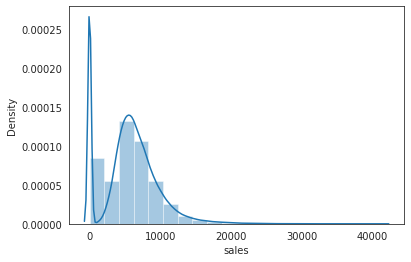

In [227]:
sns.set_style('white')
sns.distplot(df1['sales'], bins=20);
